TODO:  
columna tipodepropiedad con principales tipos y otros  
stacked barplot  

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('data/train.csv', index_col=['id'], parse_dates=['fecha'], error_bad_lines=False)

# merge regiones
regiones = pd.read_csv('data/regionesMexico.csv')
df = df.merge(regiones,on='provincia', how='inner')

# merge precio constante
inflacion_mex = pd.read_csv('./data/inflacion_mex.csv',names=['fecha_mes','indice'],parse_dates=['fecha_mes'],dtype={'indice':np.float64})
# Cambio de base al ultimo dato.
infla2019 = inflacion_mex['indice'].tail(1).values[0]
inflacion_mex['indice'] = (inflacion_mex['indice']/infla2019)*100
# Elimino el número de día para poder joinear ambos DF.
inflacion_mex['fecha_mes'] = inflacion_mex['fecha_mes'].dt.to_period('M')
df['fecha_mes']= df['fecha'].dt.to_period('M')
df = df.merge(inflacion_mex,how='inner',on='fecha_mes')
df['precio_constante'] = (df['precio']/df['indice'])*100

In [23]:
df['tipodepropiedad2'] = df.loc[df.tipodepropiedad.isin(['Apartamento', 'Casa en condominio', 'Casa', 'Duplex'])]
len(dfViviendas)

218556

## Estacionalidad: mes / día / año

/home/martinkondra/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Cantidad de publicaciones')

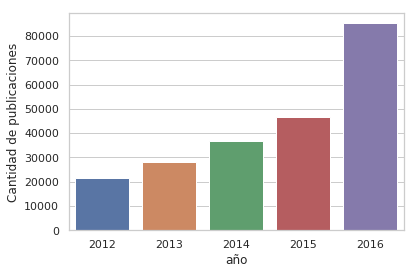

In [76]:
dfViviendas['año'] = dfViviendas.fecha.dt.year
df3 = dfViviendas.groupby(['año'])['precio'].count().to_frame().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="año", y="precio", data=df3)
plt.ylabel('Cantidad de publicaciones')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

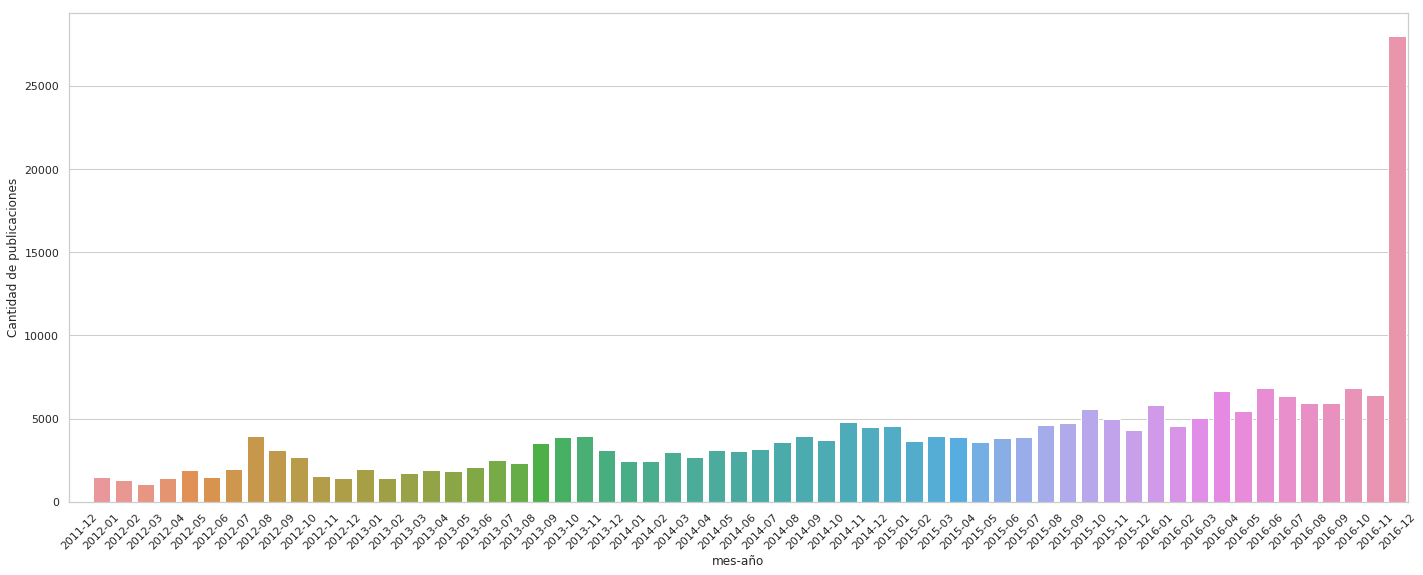

In [88]:
from pandas.tseries.offsets import MonthBegin
df['mes-año'] = (df.fecha - MonthBegin(1)).dt.strftime('%Y-%m')
df3 = df.groupby(['mes-año'])['precio'].count().to_frame().reset_index()
#df3
plt.figure(figsize=(24,9))
sns.set(style="whitegrid")
sns.barplot(x="mes-año", y="precio", data=df3)
plt.ylabel('Cantidad de publicaciones')
plt.xticks(rotation=45)

/home/martinkondra/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Cantidad de publicaciones')

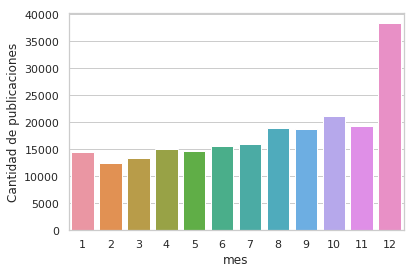

In [75]:
dfViviendas['mes'] = dfViviendas.fecha.dt.month
df3 = dfViviendas.groupby(['mes'])['precio'].count().to_frame().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="mes", y="precio", data=df3)
plt.ylabel('Cantidad de publicaciones')

/home/martinkondra/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


([<matplotlib.axis.XTick at 0x7fb89889f320>,
 <a list of 7 Text xticklabel objects>)

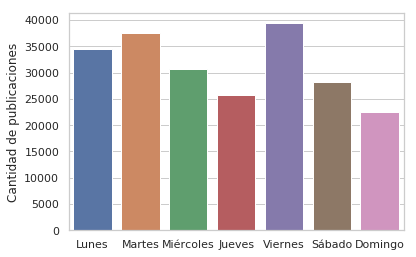

In [74]:
dfViviendas['dia'] = dfViviendas.fecha.dt.dayofweek
df3 = dfViviendas.groupby(['dia'])['precio'].count().to_frame().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="dia", y="precio", data=df3)
plt.ylabel('Cantidad de publicaciones')
plt.xlabel('')
plt.xticks(np.arange(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

In [60]:
dfViviendas['año'] = dfViviendas.fecha.dt.year
df3 = dfViviendas.groupby(['tipodepropiedad', 'año'])['precio'].count().unstack().reset_index()
df3
#sns.barplot(x="año", y="precio", hue="tipodepropiedad", data=df3)

/home/martinkondra/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


año,tipodepropiedad,2012,2013,2014,2015,2016
0,Apartamento,5071.00,6716.00,9671.00,12780.00,23062.00
1,Casa,13728.00,19366.00,24208.00,29800.00,54518.00
2,Casa en condominio,2835.00,1960.00,3038.00,4095.00,7365.00
3,Duplex,nan,nan,nan,42.00,301.00


## Inconsistencia de datos: metros totales y metros cubiertos

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00,
        2.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+01, 1.6000e+01,
        1.5000e+01, 2.2000e+01, 4.1000e+01, 5.0000e+01, 6.7000e+01,
        1.0800e+02, 9.0000e+01, 1.1500e+02, 1.7800e+02, 2.2200e+02,
        3.5800e+02, 2.9100e+02, 4.6700e+02, 3.5400e+02, 5.8400e+02,
        7.3400e+02, 8.7700e+02, 9.7700e+02, 1.1900e+03, 9.3600e+02,
        1.5560e+03, 1.6180e+03, 2.5340e+03, 2.2770e+03, 2.1420e+03,
        3.8260e+03, 3.8010e+03, 4.1310e+03, 5.0790e+03, 5.9110e+03,
        4.8290e+03, 6.4900e+03, 7.1400e+03, 7.2630e+03, 4.3361e+04,
        8.9060e+03, 6.9130e+03, 7.3530e+03, 6.1130e+03, 4.5980e+03,
        4.6670e+03, 3.2150e+03, 2.3610e+03, 2.5060e+03, 2.3320e+03,
        1.5460e+03, 1.7970e+03, 1.2640e+03, 8.4100e+02, 9.9800e+02,
        7.4200e+02, 7.7900e+02, 6.0700e+02, 4.1400e+02, 5.0700e+02,
        4.1600e+02, 3.4700e+02, 2.6700e+02, 3.44

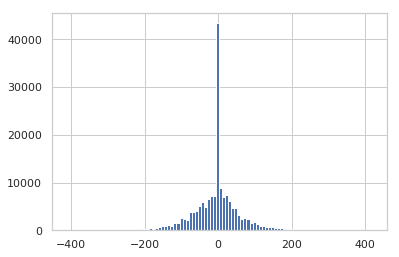

In [109]:
df['metrosdescubiertos'] = df['metrostotales']-df['metroscubiertos']
plt.hist(df['metrosdescubiertos'].dropna(), bins=100)
#min(df['metrosdescubiertos'])

## Frecuencia y densidad del precio. Distribución asimétrica positiva. (Muchas propiedades baratas)

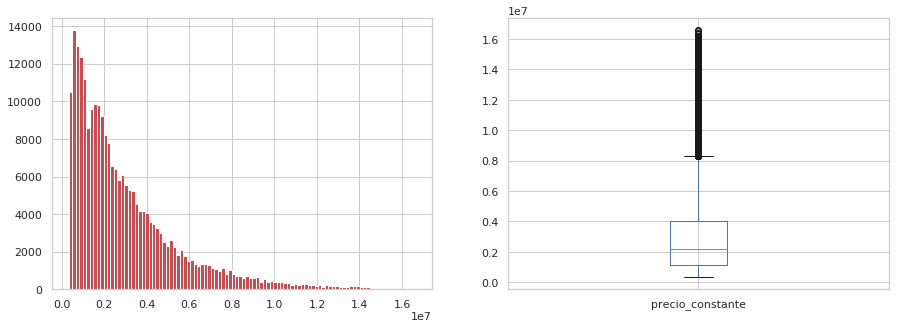

In [112]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
#axes[0].ticklabel_format(style = 'plain')
df['precio_constante'].hist(bins=100, ax=axes[0], color='r'); 
#np.log(df['precio']).hist(bins=80, ax=axes[0], color='g'); 
df['precio_constante'].plot(kind='box', ax=axes[1]);
plt.show()

## Correlación general entre variables

Text(0.5,1,'Matriz de correlaciones')

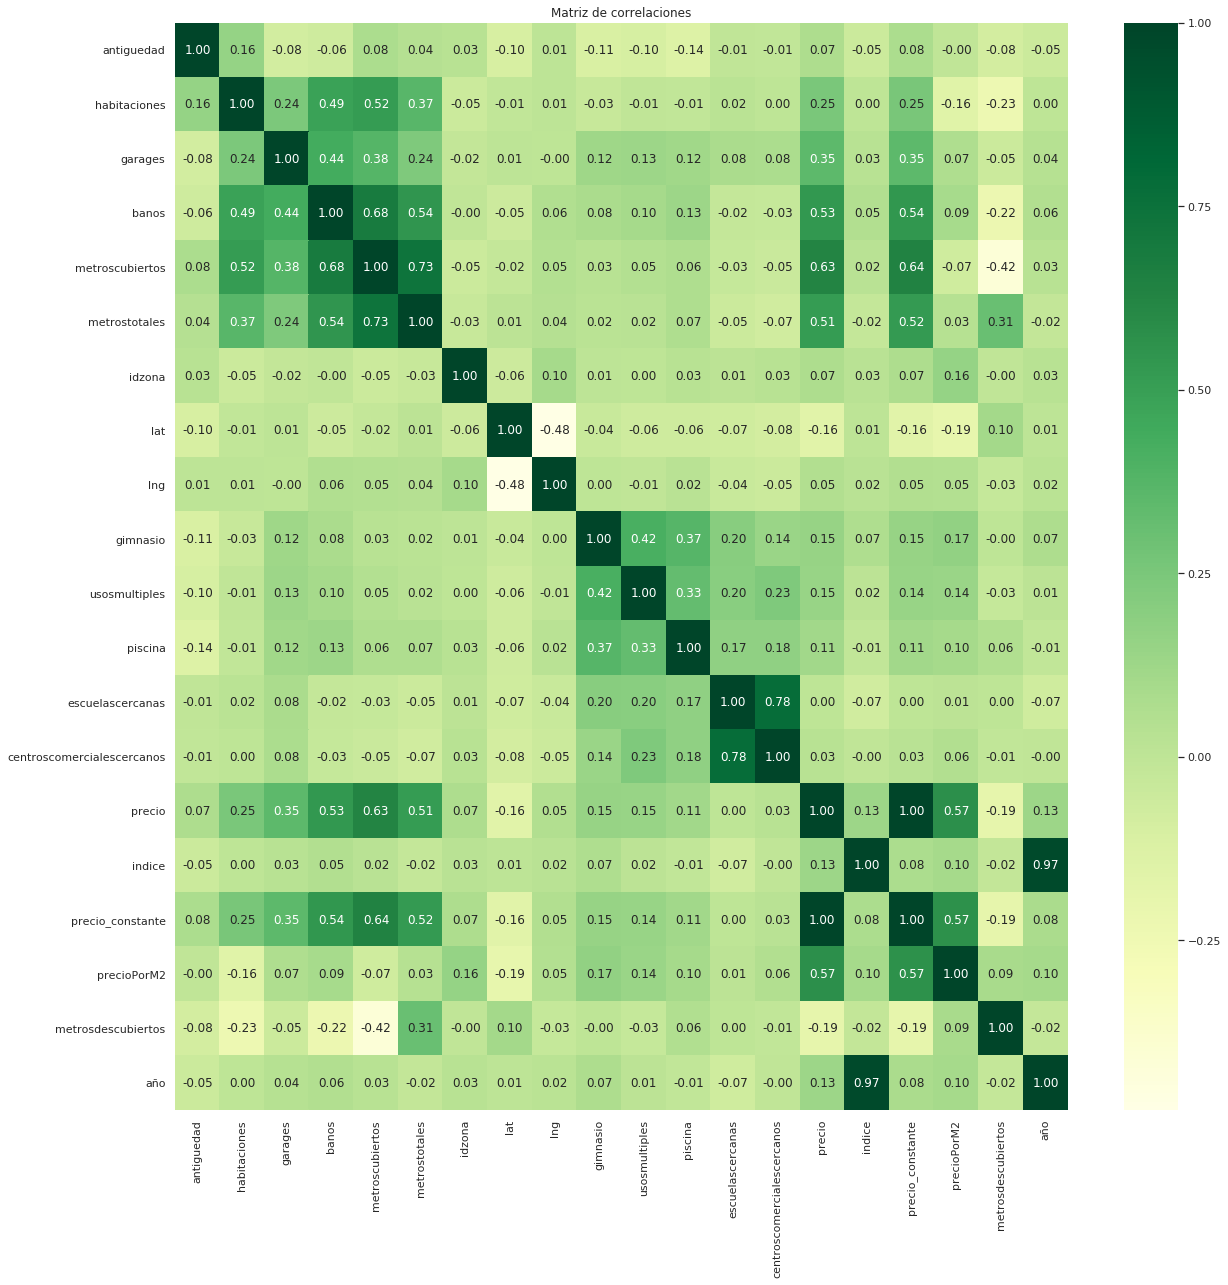

In [135]:
# Creamos una matriz de correlaciones solo para las variables cuantitativas.
#variables_cuantitativas = ['precio', 'metros', 'maxMetros', 'metrostotales','metroscubiertos','banos','garages','habitaciones','antiguedad']
plt.figure(figsize=(20,20))
cm= df.corr()#df[variables_cuantitativas].corr()
hm = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGn")
hm.set_title('Matriz de correlaciones')

## Cómo variaron las correlaciones de los principales predictores del tiempo año a año.

Text(138.5,0.5,'Variable')

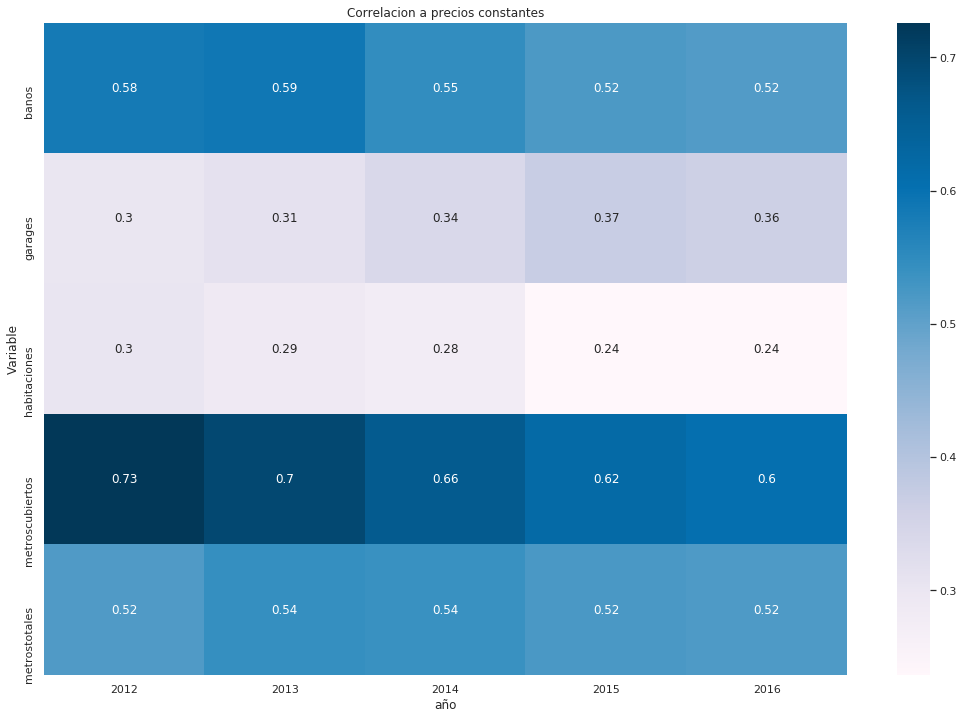

In [130]:
df['año'] = df.fecha.dt.year
corrTipo = df.groupby(['año']).corr()[['habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales']]
#corrTipo
stackedCorrTipo = corrTipo.stack().reset_index()
stackedCorrTipo = stackedCorrTipo.loc[stackedCorrTipo.level_1=='precio_constante']
stackedCorrTipo.columns = stackedCorrTipo.columns.map(str)
#stackedCorrTipo.sort_values(by='0', ascending=False)
##stackedCorrTipo.columns = stackedCorrTipo.columns.map(str)
stackedCorrTipo


# Heatmap by Genre and Year
pivoted = pd.pivot_table(stackedCorrTipo,values='0',columns='año', index='level_2')
pivoted
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(pivoted, cmap='PuBu', annot=True);
plt.title('Correlacion a precios constantes')
plt.ylabel('Variable')

## Cómo varía el precio de las propiedades en función de dónde se encuentran geográficamente.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

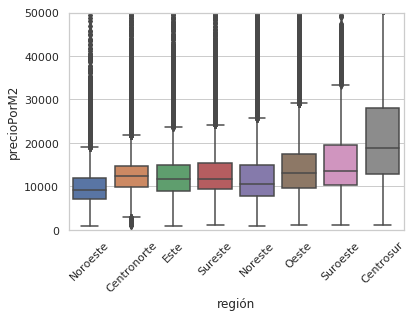

In [103]:
df['precioPorM2'] = df['precio_constante']/df['metroscubiertos']
categories = df.groupby('región').agg({'precioPorM2':'mean'}).sort_values(by='precioPorM2').index.tolist()
sns.boxplot(df['región'], df['precioPorM2'], order=categories)
plt.ylim(0,50000)
plt.xticks(rotation=45)